In [1]:
import os
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 载入初始CSV数据

In [2]:
path = os.getcwd()+'/../data/20122018freshwater.csv'
df = pd.read_csv(path, na_values = np.nan)
print(df.shape)

(33614, 8)


In [3]:
df = df.dropna(axis=0)
print(df.shape)

(33612, 8)


In [4]:
df = df.rename(columns={'pH':'$pH$','DO(mg/l)':'$DO\,(mg/L)$','CODMn(mg/l)':'$COD_{Mn}\,(mg/L)$','NH3-N(mg/l)':'$NH_{3}-N\,(mg/L)$'})

In [5]:
df.head()

,水系,点位名称,河流名称,$pH$,"$DO\,(mg/L)$","$COD_{Mn}\,(mg/L)$","$NH_{3}-N\,(mg/L)$",本周水质
0,巢湖流域,安徽巢湖裕溪口,巢湖,7.09,10.0,5.7,0.33,3
1,巢湖流域,合肥湖滨,巢湖,6.94,12.0,5.4,0.40,3
2,巢湖流域,安徽巢湖裕溪口,巢湖,7.20,9.6,4.9,0.34,3
3,巢湖流域,合肥湖滨,巢湖,6.80,11.6,6.3,0.59,4
4,巢湖流域,合肥湖滨,巢湖,6.75,11.0,6.2,0.64,4


In [6]:
cats = df.本周水质.value_counts()

In [7]:
cats_df = pd.DataFrame({'cats':cats.index[0:],'fre':cats.values[0:]})

In [8]:
cats_df

,cats,fre
0,2,13272
1,3,8797
2,4,5472
3,1,2438
4,6,2146
5,5,1487


In [9]:
width_inch = 6*0.84

In [10]:
df = df[['$pH$', '$DO\,(mg/L)$', '$COD_{Mn}\,(mg/L)$', '$NH_{3}-N\,(mg/L)$']]

In [11]:
df.head()

,$pH$,"$DO\,(mg/L)$","$COD_{Mn}\,(mg/L)$","$NH_{3}-N\,(mg/L)$"
0,7.09,10.0,5.7,0.33
1,6.94,12.0,5.4,0.40
2,7.20,9.6,4.9,0.34
3,6.80,11.6,6.3,0.59
4,6.75,11.0,6.2,0.64


In [12]:
# matplotlib.rcParams['font.family']='Times New Roman'
matplotlib.rcParams['font.family']='Arial'
# matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'font.weight': 'bold'}) 
# weights = ['light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black']
# 12px = 9pt

<Figure size 3600x2400 with 0 Axes>

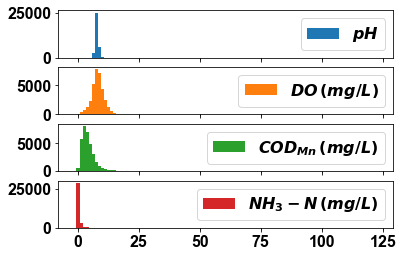

In [13]:
plt.figure(dpi=600)

figArray = df.plot.hist(subplots=True, bins=100)  #将各列在一figure中分成子图，
figArray[0].set_ylabel("")
figArray[1].set_ylabel("")
figArray[2].set_ylabel("")
figArray[3].set_ylabel("")

plt.savefig('../img/before.pdf')
plt.show()

In [14]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter 

# ymajorFormatter = FormatStrFormatter('%1.2f') #设置y轴标签文本的格式
ymajorFormatter = FormatStrFormatter('%d') #设置y轴标签文本的格式
# ymajorLocator   = MultipleLocator(0.5) #将y轴主刻度标签设置为0.5的倍数
# yminorLocator  = MultipleLocator(0.01) #将此y轴次刻度标签设置为0.1的倍数

In [15]:
df = (df-df.mean())/df.std(ddof=0)

In [16]:
df = df.rename(columns={
    '$DO\,(mg/L)$':'$DO$',
    '$COD_{Mn}\,(mg/L)$':'$COD_{Mn}$',
    '$NH_{3}-N\,(mg/L)$':'$NH_{3}-N$'})

<Figure size 3600x2400 with 0 Axes>

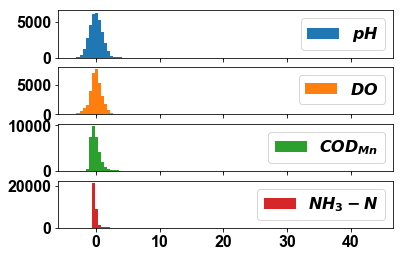

In [17]:
plt.figure(dpi=600)

figArray = df.plot.hist(subplots=True, bins=100)  #将各列在一figure中分成子图，
figArray[0].set_ylabel("")
figArray[1].set_ylabel("")
figArray[2].set_ylabel("")
figArray[3].set_ylabel("")

plt.savefig('../img/after.pdf')
plt.show()

In [19]:
df.to_excel("../after.xls")